# K-Means 

## Can you identify similar handwritten digits?

metadata: https://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
from sklearn.datasets import load_digits
import pandas as pd
digits = load_digits()

Make use of the digits.data (X) and digits.target (y) components of the dataset.

#### Question 1: What is the shape of the data?

In [9]:
# add your code here
# Create a DataFrame with the data
df = pd.DataFrame(digits.data)

# Add the target column to the DataFrame
df['target'] = digits.target

# Get the shape of the DataFrame
shape = df.shape

print("Shape of the data:", shape)

df.head(1)

Shape of the data: (1797, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0


The data has 64 features, and we have 1797 observations to build our model with. 

#### Question 2: What does the first observation look like?

In [10]:
# add your code here


Here is how the target feature looks like:

In [11]:
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
# what are the distinct target classes?
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Let's take a look at some examples of these images:

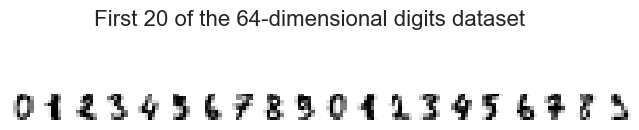

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=20, figsize=(8, 2))
for i,ax in enumerate(axs):
    ax.imshow(digits.data[i].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("First 20 of the 64-dimensional digits dataset", fontsize=16)

#### Question 3: Create a KMeans model with 10 clusters, use random_state=0, n_init = 20

In [14]:

# Load the dataset
digits = load_digits()

# Create a DataFrame with the data
data = pd.DataFrame(digits.data)

# Create a KMeans model
kmeans = KMeans(n_clusters=10, random_state=0, n_init=20)

# Fit the model to the data
kmeans.fit(data)

# Predict the cluster for each data point
predictions = kmeans.predict(data)

In [15]:
# what is the shape of cluster centers?
kmeans.cluster_centers_.shape

(10, 64)

**KMeans algorithm created 10 clusters, which numbers are assigned to which cluster?**

In our digits example, let's review the cluster assignments and compare with the true labels. The question we are answering is not whether clustering algorithm is able to cluster (group) all images of 1's to cluster 1. We are after whether clustering algorithm was able to group all images of 1's into the same cluster.

We can use accuracy_score for validation since we know the true labels in this example, however pre-processing the cluster assignments to the true groups is required. In clustering, the decision is grouping similar items, and not the cluster number assignment, hence the kmeans labels won't match the true groups. We will also check the adjusted_rand_score, Adjusted Rand Index (ARI) after the preprocessing.

In [17]:
# there are 10 clusters
set()

TypeError: 'KMeans' object is not iterable

In [ ]:
# here is list of first 10 cluster assignments 
# (0th observation is assigned to cluster 0 in my version)
# (1st observation is assigned to cluster 2)
clusters[:10]

In [ ]:
# we can check the true value of the 0th observation and find out which numbers are in cluster 5 
digits.target[0],digits.target[clusters==5]

we see that 0th record is a 0, and it is classified in cluster 5.
when checking what other numbers are classified into cluster 5, we see a 2 and a 6. these two were incorrecly classified as similar to 0s, and assigned to the cluster 5. 

In [ ]:
from scipy.stats import mode
for i in range(10):
    print ('Cluster {} refers to digit {}s'.format(i,mode(digits.target[clusters==i])[0][0]))

Since we have the target labels, we can check the accuracy score of our model.

In [ ]:
# mapping the labels correctly, using the logic above.
from scipy.stats import mode
import numpy as np
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

We have about 80% accurate model. Check out the confusion matrix to see where the model is making mistakes, and where it is doing a great job.  

#### Question 4: How do you calculate the confusion matrix?

In [ ]:
# add your code here
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(  ____        )# confusion matrix

Best way to observe a confusion matrix is by calling in a heatmap!

In [ ]:
import seaborn as sns
sns.heatmap(mat.T, square=True, annot=True, 
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Since we have the labels, we can as well create the classification report to see rest of the metrics. 

#### Question 5: How do you calculate the classification report? Print and review the numbers!

In [ ]:
# add your code here
from ....
print()           # classification report

---
#### Would normalizing the data help? Testing normalization:

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler,Normalizer

In [ ]:
def run_kmeans(scaled):
    kmeans = KMeans(n_clusters=10, random_state=0)
    clusters = kmeans.fit_predict(scaled)
    labels = np.zeros_like(clusters)
    for i in range(10): labels[clusters == i] = mode(digits.target[clusters == i])[0]
    print (accuracy_score(digits.target, labels))

In [ ]:
# calculates the mean and standard deviation of the data set and normalizes it by 
# subtracting the mean and dividing by standard deviation
# sensitive to outliers
scaler = StandardScaler()
scaled = scaler.fit_transform(digits.data)
run_kmeans(scaled)

In [ ]:
# similar to StandardScalar, but is applied on rows instead of columns
scaler = Normalizer()
scaled = scaler.fit_transform(digits.data)
run_kmeans(scaled)

In [ ]:
# removes median and scales the data according to the quantile range 
# IQR: Interquartile Range, default is 25th and 75th
# handles outliers, skewness well
# doesn't consider mean or median
scaler = RobustScaler()
scaled = scaler.fit_transform(digits.data)
run_kmeans(scaled)

In [ ]:
# scales the data set between 0 and 1
# sensitive to outliers
# use if zero mean and unit variance should be avoided
scaler = MinMaxScaler()
scaled = scaler.fit_transform(digits.data)
run_kmeans(scaled)

#### Question 6: How do we choose k? Using average within cluster squared distances! 
Test k in range (1,15) and use inertia to select k.
Create an elbow graph and interpret the graph.

In [ ]:
# your code here

#### Question 7: Discuss cluster separation: distance between clusters

In [ ]:
# your code here
kmeans =  
mat = 

In [ ]:
sns.heatmap(mat.T, square=True, annot=True,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### Question 8: Calculate silhouette score, and plot

The silhouette score computes the compactness of a cluster, where higher is better, with a perfect score of 1. While compact clusters are good, compactness doesn’t allow for complex shapes. Use caution when usign the silhouette score!

In [ ]:
# your code here

In [ ]:
for k in range(2, 15):
    # your code here 

plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#### Question 9: Calculate the Adjusted Rand Index (since we know the actual labels)

In [ ]:
# your code here



#### Question 10: What does the ARI score mean?

In [ ]:
# your comments here



In [1]:
#### DONE!